<H2>English Premier League 2018, Compare Betting Odds.</H2>

<p>This notebook has a basic comparison between the actual results in a 2018 Premier League Season and the bookie's odds expect results.</p>

<p>The first step is to identify the win probabilities by any team using the bookie's betting odds, playing as local(home) and visitor(away). Then compare the probabilities of winning when the teams are the dog in the match and compare them to the actual results.</p>

<p>In summary, it will be about evaluating when the bookies give a team as favorite how likely it ends up winning.</p>

<p>The data was downloaded from https://www.football-data.co.uk/books.php</p>

<p>In this notebook you could find:
<ul>Pandas and Numpy implementation.</ul>    
</p>

<H3>Welcome!!!</H3>

##Import Libraries.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the Data
English Premier League Season 2018

In [158]:
!git clone https://github.com/Hardila-data/Premier_L.git

fatal: destination path 'Premier_L' already exists and is not an empty directory.


Load data as pandas DataFrame

In [159]:
url = 'Premier_L/Premier_League_2018.csv'
Premier_League_2018 = pd.read_csv(url)
Premier_League_2018.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


<p>Important features will be chosen: HomeTeam, AwayTeam, FTR, B365H, B365D,B365A</p>

<p>Two DataFrames will be created, one to take the teams that played home (HomeTeam) and another to take the teams that played away (AwayTeam). To the home team DataFrame, the probabilities of winning will be the B365H feature, to the away teams DataFrame, the probabilities of winning will be the feature B365A.</p>


In [160]:
columns_to_home = ['HomeTeam','B365H','B365D','B365A','FTR']

In [161]:
df_home = Premier_League_2018[columns_to_home]
df_home = df_home.rename(columns={'HomeTeam':'Team','B365H':'Win_odds', 'B365D':'Draw_odds', 'B365A':'Loss_odds','FTR':'Result'})
df_home['Result'] = np.where(df_home.Result=='H',1,0)
df_home.head()

,Team,Win_odds,Draw_odds,Loss_odds,Result
0,Man United,1.57,3.9,7.50,1
1,Bournemouth,1.90,3.6,4.50,1
2,Fulham,2.50,3.4,3.00,0
3,Huddersfield,6.50,4.0,1.61,0
4,Newcastle,3.90,3.5,2.04,0


In [162]:
columns_to_away = ['AwayTeam','B365H','B365D','B365A','FTR']

In [163]:
df_away = Premier_League_2018[columns_to_away]
df_away = df_away.rename(columns={'AwayTeam':'Team','B365H':'Loss_odds', 'B365D':'Draw_odds', 'B365A':'Win_odds','FTR':'Result'})
df_away['Result'] = np.where(df_away.Result=='A',1,0)
print(df_away.shape)
df_away.head()

(380, 5)


,Team,Loss_odds,Draw_odds,Win_odds,Result
0,Leicester,1.57,3.9,7.50,0
1,Cardiff,1.90,3.6,4.50,0
2,Crystal Palace,2.50,3.4,3.00,1
3,Chelsea,6.50,4.0,1.61,1
4,Tottenham,3.90,3.5,2.04,1


It's time to concatenate df_home, and df_away Dataframes, to create a total DataFrame. 

In [164]:
df_total = pd.concat([df_home, df_away])
df_total

,Team,Win_odds,Draw_odds,Loss_odds,Result
0,Man United,1.57,3.90,7.50,1
1,Bournemouth,1.90,3.60,4.50,1
2,Fulham,2.50,3.40,3.00,0
3,Huddersfield,6.50,4.00,1.61,0
4,Newcastle,3.90,3.50,2.04,0
...,...,...,...,...,...
375,Wolves,11.00,6.00,1.30,0
376,Cardiff,11.00,6.50,1.28,1
377,Huddersfield,8.50,4.75,1.44,0
378,Everton,3.50,3.50,2.20,0


The probabilities of winning, drawing, or losing will be obtained with the bookie's odds.
<p>Winning probabilities = (1/winning odds)/((1/winning odds)+(1/drawing odds)+(1/losing odds))

Drawing probabilities = (1/drawing odds)/((1/winning odds)+(1/drawing odds)+(1/losing odds))

Losing probabilities = (1/losing odds)/((1/winning odds)+(1/drawing odds)+(1/losing odds))

In [165]:
#Win_probs, draw_probs, Loss_probs
df_total['win_probs'] = 1/df_total.Win_odds/(1/df_total.Win_odds+1/df_total.Draw_odds+1/df_total.Loss_odds)
df_total['draw_probs'] = 1/df_total.Draw_odds/(1/df_total.Win_odds+1/df_total.Draw_odds+1/df_total.Loss_odds)
df_total['loss_probs'] = 1/df_total.Loss_odds/(1/df_total.Win_odds+1/df_total.Draw_odds+1/df_total.Loss_odds)
df_total.head()

,Team,Win_odds,Draw_odds,Loss_odds,Result,win_probs,draw_probs,loss_probs
0,Man United,1.57,3.9,7.50,1,0.620387,0.249745,0.129868
1,Bournemouth,1.90,3.6,4.50,1,0.512821,0.270655,0.216524
2,Fulham,2.50,3.4,3.00,0,0.389313,0.286260,0.324427
3,Huddersfield,6.50,4.0,1.61,0,0.150099,0.243911,0.605990
4,Newcastle,3.90,3.5,2.04,0,0.248382,0.276769,0.474849


<p>A new feature (dog) will be created. The dog feature will be one when the winning probabilities are greater than the probabilities drawing or losing.</p>

In [166]:
#identify the max value among  ['win_probs', 'draw_probs', 'loss_probs'] features and compare to win_probs
max_values = np.max(df_total[['win_probs', 'draw_probs', 'loss_probs']], axis=1)
df_total['dog'] = np.where(df_total.win_probs==max_values,1,0)
df_total

,Team,Win_odds,Draw_odds,Loss_odds,Result,win_probs,draw_probs,loss_probs,dog
0,Man United,1.57,3.90,7.50,1,0.620387,0.249745,0.129868,1
1,Bournemouth,1.90,3.60,4.50,1,0.512821,0.270655,0.216524,1
2,Fulham,2.50,3.40,3.00,0,0.389313,0.286260,0.324427,1
3,Huddersfield,6.50,4.00,1.61,0,0.150099,0.243911,0.605990,0
4,Newcastle,3.90,3.50,2.04,0,0.248382,0.276769,0.474849,0
...,...,...,...,...,...,...,...,...,...
375,Wolves,11.00,6.00,1.30,0,0.088536,0.162316,0.749149,0
376,Cardiff,11.00,6.50,1.28,1,0.088605,0.149947,0.761448,0
377,Huddersfield,8.50,4.75,1.44,0,0.115045,0.205870,0.679085,0
378,Everton,3.50,3.50,2.20,0,0.278481,0.278481,0.443038,0


##Let's make some plots!!!

In [167]:
df_total['expected_vs_actual'] = np.where(df_total.Result==df_total.dog,1,0)

Text(0.5, 1.0, 'Expected_result vs Actual results')

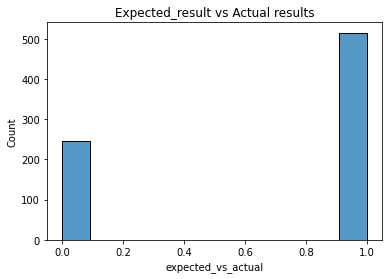

In [168]:
expected_vs_actual_plot = sns.histplot(x='expected_vs_actual', data=df_total)
expected_vs_actual_plot.set_title('Expected_result vs Actual results')

Calculate the percentage of the teams chosen as the dog by bookies, end up winning the match.<p>

(Actual_result)/(expected_to_win_by_bookies)

Actual_result = df_total.Result.sum()

expected_to_win_by_bookies = df_total.dog.sum()


In [170]:
Actual_result = df_total.Result.sum()
expected_to_win_by_bookies = df_total.dog.sum()
percentage_result = Actual_result/expected_to_win_by_bookies
print(f'The percentage of the teams chosen as the dog by bookies, end up winning the match is {percentage_result*100}%')

The percentage of the teams chosen as the dog by bookies, end up winning the match is 80.89005235602095%


<p>In summary, the bookies in the 2018 premier league season were more than 80% right when they choose one team as a dog over its opponent, this is in regard to prematch betting. That means bookies give less than 20% percent of the chance to win to the bettors if bet in against the favorite.</p>

##Thanks!!!